### Grading Feedback

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Yash Pasar <yspasar@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include a title, and axis labels.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- Students may use toPandas() to print the head of data frames.
- __Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.__

In [214]:
# Do not delete or change this cell

import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Question 1
Using the get_training_filename function defined in the cell above, read the sms_spam.csv file into a spark dataframe named spam_df.  There should be no empty columns in spam_df.

In [215]:
# Your code here

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

#read sms_spam.csv file into a spark dataframe named spam_df
spam_df = spark.read.csv(get_training_filename('sms_spam.csv'), header=True, inferSchema=True)
spam_df.show()

+----+--------------------+
|type|                text|
+----+--------------------+
| ham|Go until jurong p...|
| ham|Ok lar... Joking ...|
|spam|Free entry in 2 a...|
| ham|U dun say so earl...|
| ham|Nah I don't think...|
|spam|FreeMsg Hey there...|
| ham|Even my brother i...|
| ham|As per your reque...|
|spam|WINNER!! As a val...|
|spam|Had your mobile 1...|
| ham|I'm gonna be home...|
|spam|SIX chances to wi...|
|spam|URGENT! You have ...|
| ham|I've been searchi...|
| ham|I HAVE A DATE ON ...|
|spam|XXXMobileMovieClu...|
| ham|Oh k...i'm watchi...|
| ham|Eh u remember how...|
| ham|Fine if that's th...|
|spam|England v Macedon...|
+----+--------------------+
only showing top 20 rows



### Grading Feedback

# Question 2
Starting with spam_df, create a new dataframe named spam_df1.  Rename the spam_df type column to be named spam.  In the spam column, replace the string `spam` the with the integer 1 and the string `ham` with the integer 0.  Print the head and shape of spam_df1.

In [216]:
# your code here

#create spam_df1 and rename 'type' to 'spam'
spam_df1 = spam_df.withColumnRenamed("type", "SPAMM") #column name changed to SPAMM to avoid confusion when 
                                                      #dropping extra columns later                      
spam_df1.show()

#in spam column, replacing 'spam' with 1 and 'ham' with 0
from pyspark.sql import functions as fn
    
binary = spam_df1.select("SPAMM").distinct().rdd.flatMap(lambda x: x).collect()
Expr = [fn.when(fn.col("SPAMM") == spam, 1).otherwise(0).alias(spam) for spam in binary]
spam_df1 = spam_df1.select(Expr + spam_df1.columns)
#spam_df1.show()

#dropping the extra columns
spam_df1 = spam_df1.drop("ham")
spam_df1 = spam_df1.drop("SPAMM")
spam_df1.show()

#head and shape of spam_df1
print("Head of spam_df1:", spam_df1.head())
print("\n")
print("Shape of spam_df1:", spam_df1.count(), len(spam_df1.columns)) 

+-----+--------------------+
|SPAMM|                text|
+-----+--------------------+
|  ham|Go until jurong p...|
|  ham|Ok lar... Joking ...|
| spam|Free entry in 2 a...|
|  ham|U dun say so earl...|
|  ham|Nah I don't think...|
| spam|FreeMsg Hey there...|
|  ham|Even my brother i...|
|  ham|As per your reque...|
| spam|WINNER!! As a val...|
| spam|Had your mobile 1...|
|  ham|I'm gonna be home...|
| spam|SIX chances to wi...|
| spam|URGENT! You have ...|
|  ham|I've been searchi...|
|  ham|I HAVE A DATE ON ...|
| spam|XXXMobileMovieClu...|
|  ham|Oh k...i'm watchi...|
|  ham|Eh u remember how...|
|  ham|Fine if that's th...|
| spam|England v Macedon...|
+-----+--------------------+
only showing top 20 rows

+----+--------------------+
|spam|                text|
+----+--------------------+
|   0|Go until jurong p...|
|   0|Ok lar... Joking ...|
|   1|Free entry in 2 a...|
|   0|U dun say so earl...|
|   0|Nah I don't think...|
|   1|FreeMsg Hey there...|
|   0|Even my brother i...

# Question 3
Starting with spam_df1, create a new dataframe named spam_df2 with a new column named filtered_text by removing stop words from the text column in spam_df.  Print the head and shape of spam_df2.

In [217]:
# your code here

from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer().setInputCol('text').setOutputCol('tokenized_words')


spam_df2 = tokenizer.transform(spam_df1)
#spam_df2.show(5)


import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
stop_words[0:10]


from pyspark.ml.feature import StopWordsRemover
sw = StopWordsRemover().setStopWords(stop_words).setCaseSensitive(False).setInputCol("tokenized_words")\
        .setOutputCol("filtered_text")


from pyspark.ml import Pipeline
sw_pipeline = Pipeline(stages = [tokenizer, sw]).fit(spam_df1)


spam_df2 = sw_pipeline.transform(spam_df1)
spam_df2.show()


#head and shape of spam_df1
print("Head of spam_df2:", spam_df2.head())
print("\n")
print("Shape of spam_df2:", spam_df2.count(), len(spam_df2.columns)) 

+----+--------------------+--------------------+--------------------+
|spam|                text|     tokenized_words|       filtered_text|
+----+--------------------+--------------------+--------------------+
|   0|Go until jurong p...|[go, until, juron...|[jurong, point,, ...|
|   0|Ok lar... Joking ...|[ok, lar..., joki...|[ok, lar..., joki...|
|   1|Free entry in 2 a...|[free, entry, in,...|[free, entry, 2, ...|
|   0|U dun say so earl...|[u, dun, say, so,...|[u, dun, say, ear...|
|   0|Nah I don't think...|[nah, i, don't, t...|[nah, don't, thin...|
|   1|FreeMsg Hey there...|[freemsg, hey, th...|[freemsg, hey, da...|
|   0|Even my brother i...|[even, my, brothe...|[brother, like, s...|
|   0|As per your reque...|[as, per, your, r...|[request, 'melle,...|
|   1|WINNER!! As a val...|[winner!!, as, a,...|[winner!!, valued...|
|   1|Had your mobile 1...|[had, your, mobil...|[mobile, 11, mont...|
|   0|I'm gonna be home...|[i'm, gonna, be, ...|[i'm, gonna, home...|
|   1|SIX chances to

### Grading Feedback

# Question 3
Create a new dataframe named spam_df3 starting with spam_df2.  Create a new column named tfidf by performing a term frequency / inverse document frequency transformation on the filtered_text column of spam_df2.<br>  

- Print the head and shape of spam_df3.  
- Print the top 10 most important words indicated by the TFIDF score.  
- Print the 10 least important words as indicated by the TFIDF score.
- Print the total number of columns in the TFIDF data in spam_df3
- Print the number of rows in the TFIDF data in spam_df3
- Based only on the number of rows and columns in the TFIDF data, do you expect the model to overfit.  Explain your answer.

In [218]:
# Your code here

from pyspark.ml.feature import CountVectorizer
from pyspark.ml import feature, classification, evaluation, Pipeline


cv = CountVectorizer().setInputCol("filtered_text").setOutputCol("tf")


from pyspark.ml.feature import IDF
idf = IDF().\
    setInputCol('tf').\
    setOutputCol('tfidf')


tfidf_pipeline = Pipeline(stages = [cv, idf]).fit(spam_df2)


spam_df3 = tfidf_pipeline.transform(spam_df2)
spam_df3.show()


#head and shape of spam_df1
print("Head of spam_df3:", spam_df3.head())
print("\n")
print("Shape of spam_df3:", spam_df3.count(), len(spam_df3.columns)) 
print("\n")

#top 10 most important words indicated by the TFIDF score
x = tfidf_pipeline.stages[0].vocabulary
y = tfidf_pipeline.stages[1].idf
topTen = y[-10:]
topTenAgain = x[-10:]
print("Top 10 most important words as indicated by the TFIDF score is:\n", topTenAgain)
print("\n")
print("Respective IDF scores:\n", topTen)
print("\n")


#10 least important words as indicated by the TFIDF score
print("Top 10 least important words as indicated by the TFIDF score is:\n", x[1:11])
print("\n")
print("Respective IDF scores:\n", y[1:11])
print("\n")


#total number of columns in the TFIDF data in spam_df3
print("Total number of columns in spam_df3:", len(y))
print("\n")


#number of rows in the TFIDF data in spam_df3
print("Total number of rows in spam_df3:", spam_df3.count())
print("\n")


#Since the number of features are more as compared to the number of rows, the model will overfit.

+----+--------------------+--------------------+--------------------+--------------------+--------------------+
|spam|                text|     tokenized_words|       filtered_text|                  tf|               tfidf|
+----+--------------------+--------------------+--------------------+--------------------+--------------------+
|   0|Go until jurong p...|[go, until, juron...|[jurong, point,, ...|(13262,[10,29,56,...|(13262,[10,29,56,...|
|   0|Ok lar... Joking ...|[ok, lar..., joki...|[ok, lar..., joki...|(13262,[0,23,268,...|(13262,[0,23,268,...|
|   1|Free entry in 2 a...|[free, entry, in,...|[free, entry, 2, ...|(13262,[1,12,18,2...|(13262,[1,12,18,2...|
|   0|U dun say so earl...|[u, dun, say, so,...|[u, dun, say, ear...|(13262,[0,64,71,1...|(13262,[0,64,71,1...|
|   0|Nah I don't think...|[nah, i, don't, t...|[nah, don't, thin...|(13262,[30,35,279...|(13262,[30,35,279...|
|   1|FreeMsg Hey there...|[freemsg, hey, th...|[freemsg, hey, da...|(13262,[9,47,60,1...|(13262,[9,47,6

Your model overfit explanation here:

Since the number of features are more as compared to the number of rows, the model will overfit.

### Grading Feedback

# Question 4
Create a pipeline named pipe1 capable of predicting ham or spam using logistic regression using spam_df3 as input data.

In [219]:
# your code here

from pyspark.ml import feature, classification, evaluation, Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.types import DoubleType


training_df, validation_df, testing_df = spam_df3.randomSplit([0.6, 0.3, 0.1], seed=0)


lr = LogisticRegression().setLabelCol("spam").setFeaturesCol("tfidf").setRegParam(0.0).setMaxIter(100).\
        setElasticNetParam(0.)


pipe1 = Pipeline(stages=[lr]).fit(spam_df3)
spam_df3 = spam_df3.withColumn("spam", spam_df3["spam"].cast(DoubleType()))

### Grading Feedback

# Question 5
Fit pipe1 using a [CrossValidator](https://spark.apache.org/docs/2.2.0/api/python/pyspark.ml.html#pyspark.ml.tuning.CrossValidator) object with the number of cross validation folds = 3.  Score the model using a [BinaryClassificationEvaluator](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html) using ROC AUC as the metric.  Name the cross validator object cv1 and the fitted cross validator object fitted_cv1.

In [220]:
# your code here

from pyspark.sql import functions as fn, Row
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator


evaluator = BinaryClassificationEvaluator(labelCol = "spam")


paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [0.2]).addGrid(lr.elasticNetParam, [0.2]).build())


cv1 = CrossValidator(estimator = lr, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 3)


fitted_cv1 = cv1.fit(testing_df)

### Grading Feedback

# Question 6
Print the cross validation AUC score from fitted_cv1.

In [221]:
# your code here

evaluator.evaluate(fitted_cv1.transform(testing_df))

0.9637503823799327

### Grading Feedback

# Question 7
Create a ROC scatter plot from fitted_pipe1 TPR/FPR data.

        TPR
0  0.000000
1  0.078983
2  0.153949
3  0.236948
4  0.319946
   FPR
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


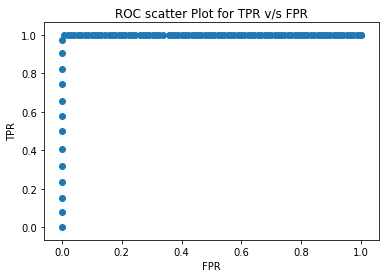

In [222]:
# your code here

import matplotlib.pyplot as plt
import seaborn as sns


fpr = pipe1.stages[-1].summary.roc.select("TPR").toPandas()
tpr = pipe1.stages[-1].summary.roc.select("FPR").toPandas()


print(fpr.head())
print(tpr.head())


plt.scatter(tpr, fpr)
plt.title("ROC scatter Plot for TPR v/s FPR")
plt.xlabel("FPR")
plt.ylabel("TPR")
display()

### Grading Feedback

# Question 8
Create a new cross validator object named cv2 similar to cv1 but this time add a ParamGridBuilder.  Define a grid of elastic net regularization parameters. Fit cv2 and name the resulting fitted cross validator fitted_cv2.  The number of parameters in your grid should be limited such that it runs in a reasonable amount of time (around 5 to 10 minutes max).  

In [232]:
# your code here

ParaGrid = (ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.3, 0.5]).addGrid(lr.elasticNetParam, [0.1, 0.2, 0.3]) 
             .build())


evaluator = BinaryClassificationEvaluator(labelCol = "spam")


cv2 = CrossValidator(estimator = lr, estimatorParamMaps = ParaGrid, evaluator = evaluator, numFolds = 3)


fitted_cv2 = cv2.fit(testing_df)

### Grading feedback

# Question 9
- Print the resulting AUC from fitted_cv2. 
- Print the best model's L1 and L2 regularization parameters
- Analyze the L1 feature selection:
    - Print the total number of features
    - Print the number of features that L1 regularization eliminated
    - If any features were eliminated, print a sample of 10 words that were eliminated

In [243]:
# your code here

import pandas as pd
from collections import OrderedDict


print("AUC score from fitted_cv2", evaluator.evaluate(fitted_cv2.transform(spam_df3)))
print("\n")


x1 = fitted_cv2.bestModel._java_obj.getElasticNetParam()
x2 = 1 - x1


print("L1 is ", format(x1))
print("L2 is ", format(x2))
print("\n")


no_of_features = pd.Series(OrderedDict(sorted((zip(tfidf_pipeline.stages[0].vocabulary,fitted_cv2.bestModel\
                                                   .coefficients.toArray())))))


print("Total number of features:", len(no_of_features))
print("Number of features eleminated by L1 regularization:", format(len(no_of_features[no_of_features == 0])))
print("Sample of words eliminated by L1 regularisation:",list(no_of_features[:10].index))

AUC score from fitted_cv2 0.9707072194585952


L1 is  0.1
L2 is  0.9


Total number of features: 13262
Number of features eleminated by L1 regularization: 12518
Sample of words eliminated by L1 regularisation: ['', '!', '!!', '!!!', '!!!!', "!!''.", '!1', '!:-)', '!this', '""']


### Grading Feedback

# Question 10
Analyze the best model weights in fitted_cv2.  Print the 10 words that contribute the most to predicting spam.  Print the 10 words that contribute the least to predicting spam.  Do the words make sense?  Explain.

In [245]:
# your code here

print("Ten words that contribute the most to predicting spam:", format(no_of_features[-10:].index))
print("\n")
print("Ten words that contribute the least to predicting spam:", list(no_of_features[:10].index))

Ten words that contribute the most to predicting spam: Index(['ü.', 'ü..', 'ü...', 'ü?', '–', '“', '“harry', '…', '….', '…thanks'], dtype='object')


Ten words that contribute the least to predicting spam: ['', '!', '!!', '!!!', '!!!!', "!!''.", '!1', '!:-)', '!this', '""']


Your comments here:

### Grading Feedback

**Extra Credit (5 pts)**  This question is optional.  If you choose to answer this question, you will earn 5 extra credit points.  If you choose not to answer this question, no points will be deducted from your score.  Solve the following equation for $c$ symbolically using the python sympy package.  Convert the solved symbolic solution to a latex format (this can be done with a pyton call), then populate the solution cell with the resulting latex code so that your solution shows up symbolically similar the equation below.

$$c g - c h + e \left(a + 1\right)^{b} - \frac{d \left(\left(a + 1\right)^{b} - 1\right)}{a} + \frac{f \left(\left(a + 1\right)^{b} - 1\right)}{a} = 0$$

In [230]:
# do not delete or change this cell

# if running on data bricks
if is_databricks():
    # install sympy
    dbutils.library.installPyPI
    dbutils.library.installPyPI('sympy')
    print(dbutils.library.list())

In [231]:
# your code here

import sympy as sym


a = sym.Symbol('a')
b = sym.Symbol('b')
c = sym.Symbol('c')
d = sym.Symbol('d')
e = sym.Symbol('e')
f = sym.Symbol('f')
g = sym.Symbol('g')
h = sym.Symbol('h')


x = c*g - c*h
y = (e*(a+1)**b)
z = ((d*((a+1)**b-1))/a)
w = ((f*((a+1)**b-1)/a))
     
eqn = sym.solve(x+y-z+w,c)
     
print(sym.latex(eqn))

\left[ \frac{- a e \left(a + 1\right)^{b} + d \left(a + 1\right)^{b} - d - f \left(a + 1\right)^{b} + f}{a \left(g - h\right)}\right]


Add your latex output here such that a human readable equation is displayed for grading
$$\left[ \frac{- a e \left(a + 1\right)^{b} + d \left(a + 1\right)^{b} - d - f \left(a + 1\right)^{b} + f}{a \left(g - h\right)}\right]$$

### Grading Feedback